In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('./liar_dataset/test.tsv', sep='\t', names=header)
train_data = pd.read_csv('./liar_dataset/train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', names=header)


In [32]:
# unit test, train, and valid into one dataset
data = pd.concat([train_data, test_data, valid_data])

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job_title        942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  context          1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statement_id     10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job_title        7342 non-null   object 
 6   state            8030 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  context          10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [35]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job_title        939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  context          1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [36]:
train_data.head()

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


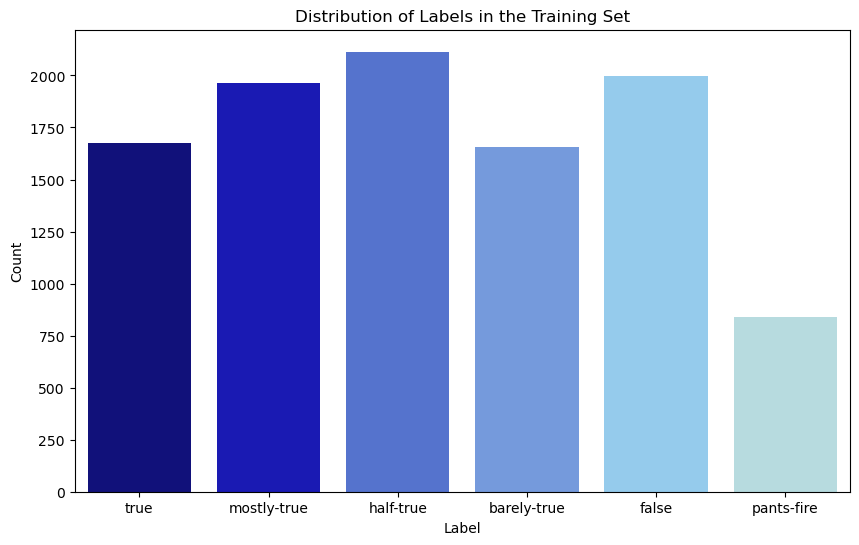

In [37]:
# Assuming train_data is your DataFrame
# Convert the labels to a categorical type if they are not already
data['label'] = data['label'].astype('category')
label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

# Define the custom color palette with a gradient from dark blue to light blue
custom_palette = ['#00008B', '#0000CD', '#4169E1', '#6495ED', '#87CEFA', '#B0E0E6']

# Plot the distribution of the labels with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', palette=custom_palette, order=label_order)
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


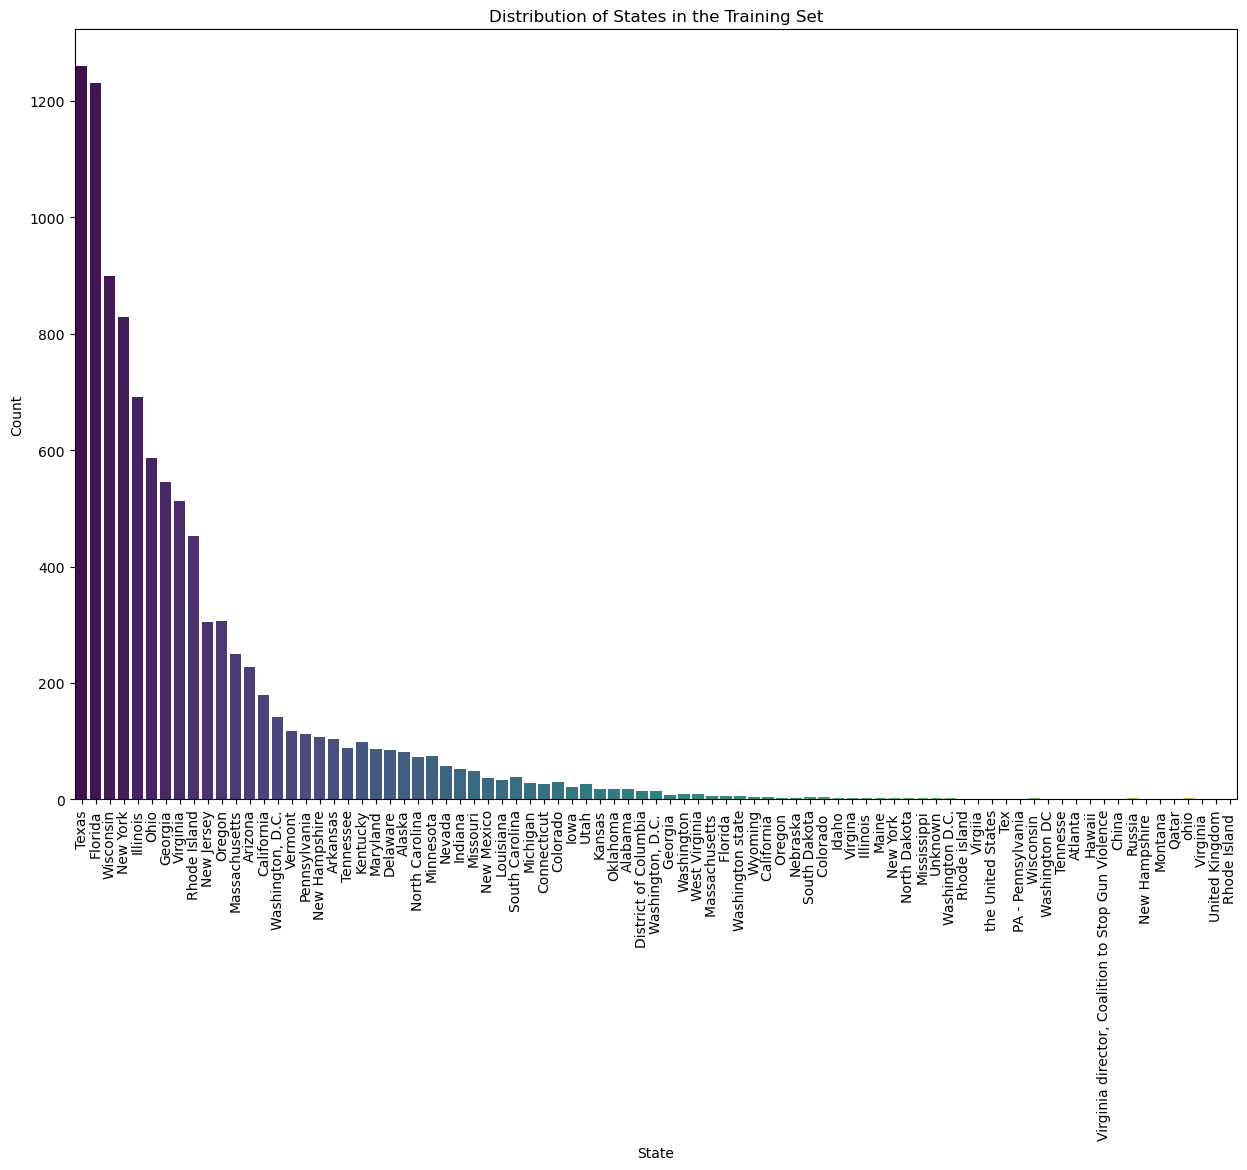

In [38]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', palette='viridis', order=train_data['state'].value_counts().index)
plt.title('Distribution of States in the Training Set')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

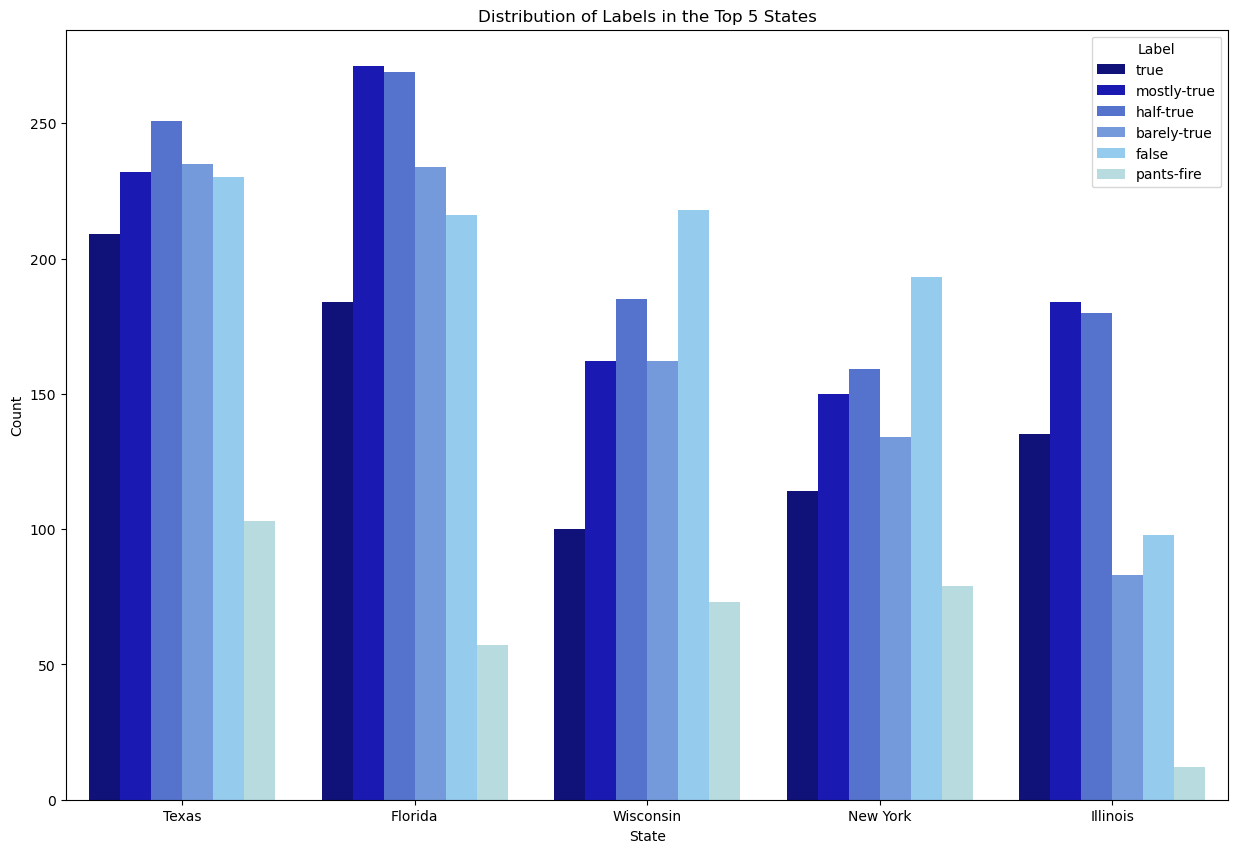

In [39]:
# show the distribution of the labels to the 5 top states
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', hue='label', palette=custom_palette, order=data['state'].value_counts().index[:5], hue_order=label_order)
plt.title('Distribution of Labels in the Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

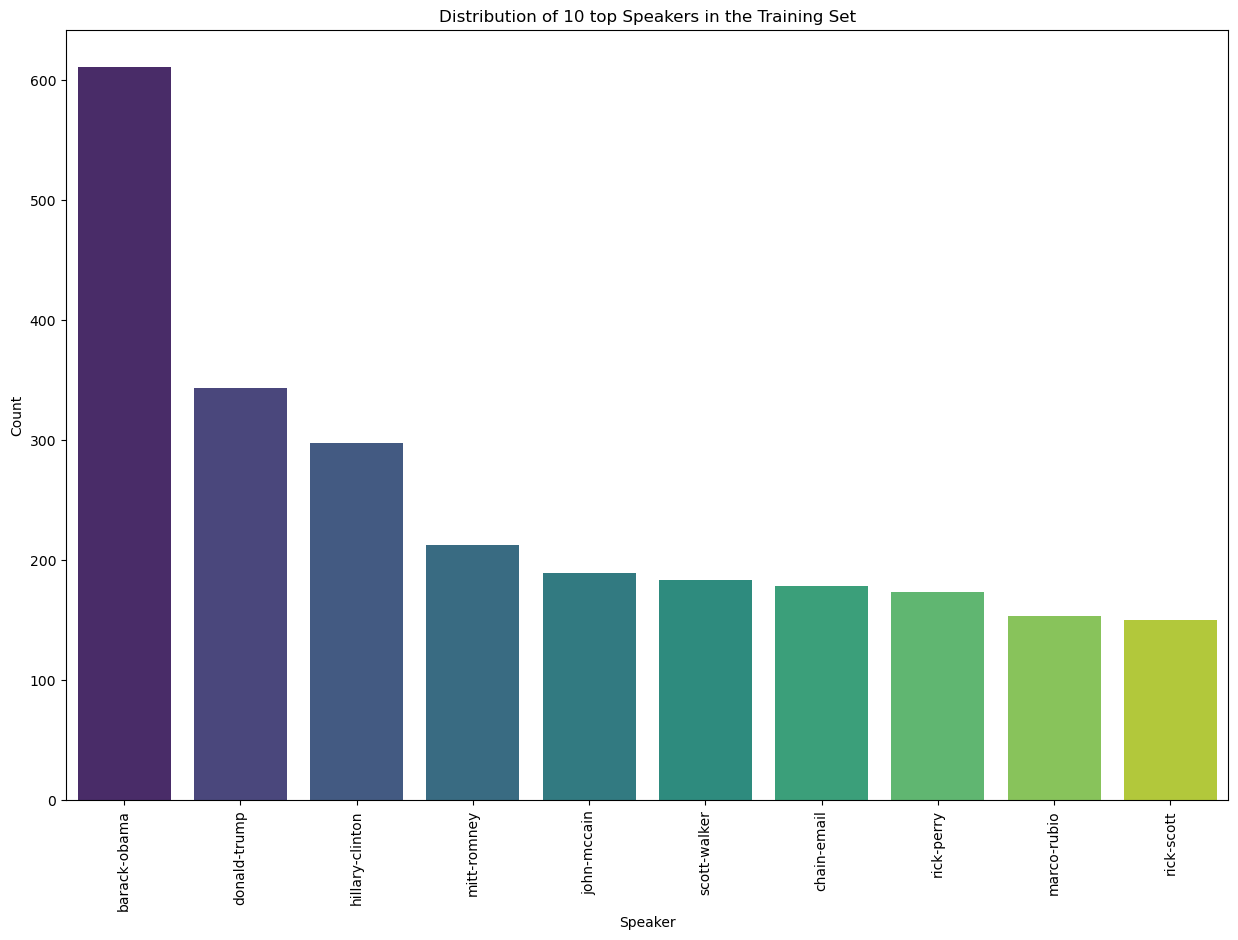

In [40]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='speaker', palette='viridis', order=data['speaker'].value_counts().index[:10])
plt.title('Distribution of 10 top Speakers in the Training Set')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\sigal\AppData\Local\Temp\ipykernel_25344\2847822668.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_speaker_data = data[train_data['speaker'] == top_speaker]
c:\Users\sigal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


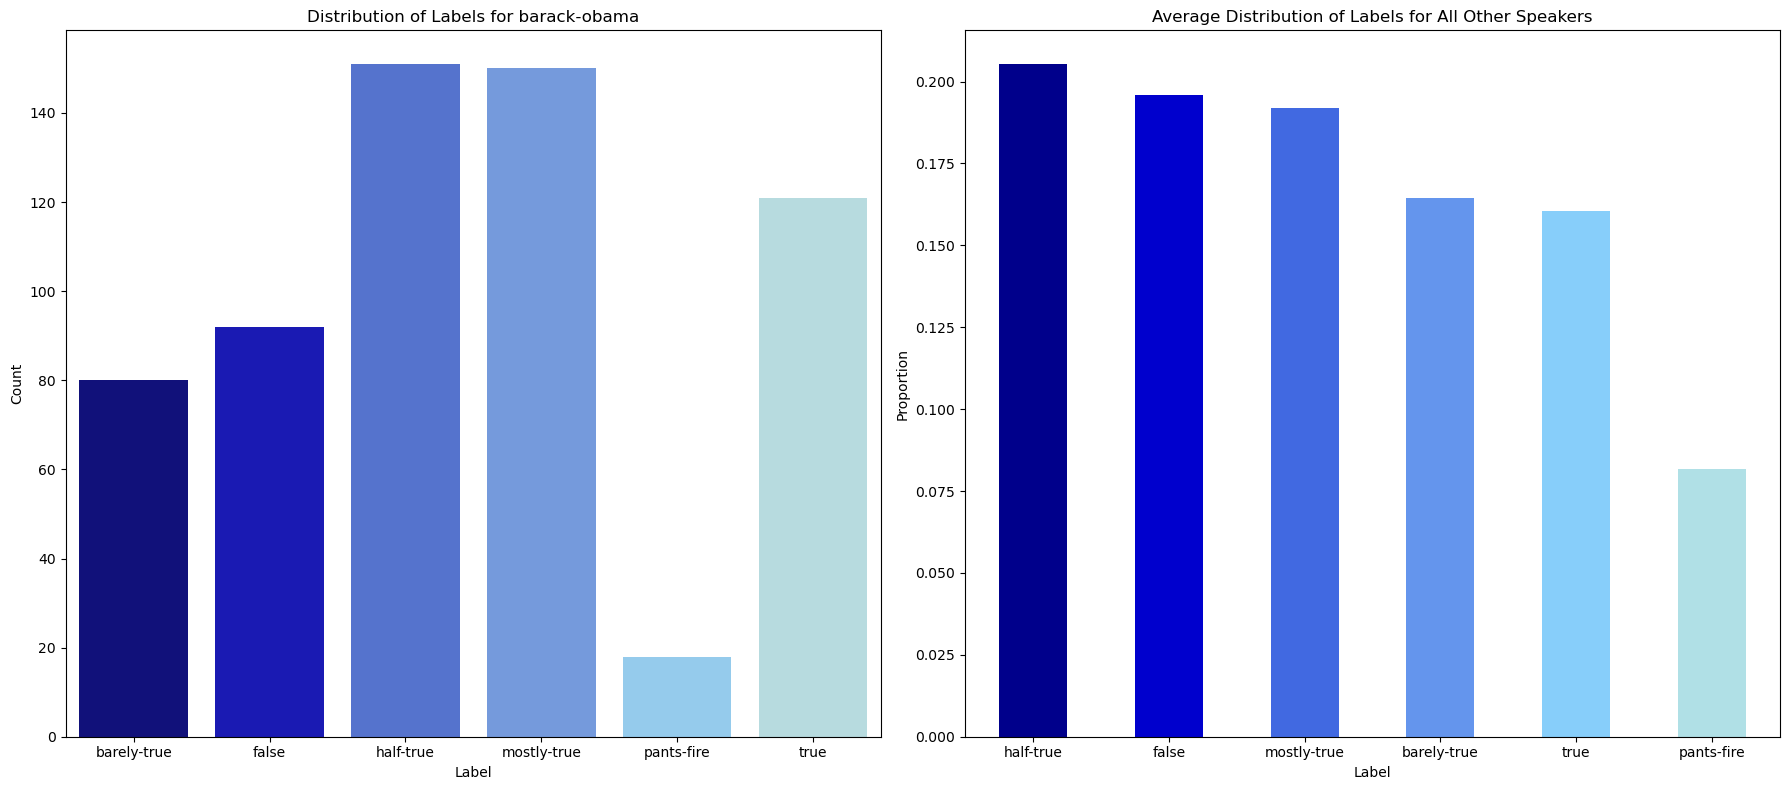

In [41]:

# Detailed analysis for the top speaker
top_speaker = data['speaker'].value_counts().idxmax()
top_speaker_data = data[train_data['speaker'] == top_speaker]
average_distribution = data['label'].value_counts(normalize=True)

# Plot the detailed analysis
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Top speaker's label distribution
sns.countplot(data=top_speaker_data, x='label', palette=custom_palette, ax=ax[0])
ax[0].set_title(f'Distribution of Labels for {top_speaker}')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Count')

# Average distribution of labels
average_distribution.plot(kind='bar', color=custom_palette, ax=ax[1])
ax[1].set_title('Average Distribution of Labels for All Other Speakers')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Proportion')
# make the labels horizontal
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# word length labeling.


In [42]:
data["statement"]

0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       Hillary Clinton agrees with John McCain "by vo...
3       Health care reform legislation is likely to ma...
4       The economic turnaround started at the end of ...
                              ...                        
1279    For the first time in more than a decade, impo...
1280    Says Donald Trump has bankrupted his companies...
1281    John McCain and George Bush have "absolutely n...
1282    A new poll shows 62 percent support the presid...
1283    No one claims the report vindicating New Jerse...
Name: statement, Length: 12791, dtype: object

In [43]:
#statement_data = data[['statement']].copy()

# Add the index as a column
data['statement_id'] = data.index

# Calculate the length of the statement by words
data['length_statement_words'] = data['statement'].apply(lambda x: len(x.split()))

# Calculate the length of the statement by letters
data['length_statement_letters'] = data['statement'].apply(lambda x: len(x.replace(" ", "")))

# Calculate the average word length per statement
data['avg_word_length_per_statement'] = data['length_statement_letters'] / data['length_statement_words']

# Move the 'index' column to the front if needed
data = data.set_index('statement_id')

# Display the new DataFrame
data.head(100)

,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,72,6.545455
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,118,4.916667
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,87,4.578947
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,12,67,5.583333
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,45,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,barely-true,Says David Jolly supports privatizing Social S...,social-security,florida-democratic-party,NaN,Florida,democrat,5.0,4.0,4.0,5.0,3.0,a robocall to 13th Congressional District voters,7,48,6.857143
96,true,Did you know US population growth is at its lo...,"immigration,population",robert-sarvis,"lawyer, businessman",Virginia,libertarian,0.0,0.0,0.0,1.0,0.0,a tweet.,14,65,4.642857
97,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,29,133,4.586207


# job title idea's


In [44]:
data["job_title"].nunique()
data["job_title"].count()

data[data["job_title"].isna()].sample(20)


,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
2436,half-true,"In Texas, a faceless hospital panel can deny l...","corrections-and-updates,health-care,legal-issues",texas-right-life,NaN,Texas,none,0.0,2.0,2.0,0.0,0.0,a video ad,32,156,4.875000
10216,false,There has been no net global warming for over ...,"climate-change,environment",cato-institute,NaN,NaN,libertarian,0.0,1.0,0.0,0.0,0.0,a political advertisement.,12,48,4.000000
594,mostly-true,I have had the challenge during this administr...,florida,charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,Associated Press' annual legislative meeting,20,96,4.800000
9587,mostly-true,Obama held one of the first meetings of his po...,candidates-biography,sarah-palin,NaN,Alaska,republican,9.0,19.0,9.0,6.0,6.0,"Clearwater, Fla.",24,119,4.958333
9314,pants-fire,Justice Antonin Scalia agreed for the Supreme ...,"candidates-biography,obama-birth-certificate,s...",chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,a chain e-mail,20,102,5.100000
478,barely-true,Says Miami Congressman Carlos Curbelo supports...,"climate-change,environment",democratic-congressional-campaign-committee,NaN,NaN,democrat,11.0,8.0,5.0,1.0,9.0,a TV ad,22,143,6.500000
1538,mostly-true,Says With nearly 75 percent of Americans suppo...,"climate-change,congress,economy,energy,environ...",national-republican-congressional-committee,NaN,NaN,republican,18.0,9.0,8.0,5.0,8.0,a press release,28,148,5.285714
9702,half-true,The United States still ranks 20th in the worl...,"economy,infrastructure,technology",russ-feingold,NaN,Wisconsin,democrat,2.0,4.0,7.0,5.0,1.0,a speech at the state Democratic Party convention,21,93,4.428571
4949,half-true,John McCain says he never supported the privat...,social-security,democratic-national-committee,NaN,NaN,none,8.0,2.0,10.0,8.0,0.0,a Web ad,17,89,5.235294


In [45]:
# Count NaNs in each column
nan_counts = data.isna().sum()

# Summary of NaNs
nan_summary = nan_counts.describe()

# Print the NaN counts and summary
print("NaN Counts in Each Column:\n", nan_counts)
print("\nSummary of NaN Counts:\n", nan_summary)


NaN Counts in Each Column:
 label                               0
statement                           0
subject                             2
speaker                             2
job_title                        3568
state                            2751
party                               2
barely_true_c                       2
false_c                             2
half_true_c                         2
mostly_true_c                       2
pants_on_fire_c                     2
context                           131
length_statement_words              0
length_statement_letters            0
avg_word_length_per_statement       0
dtype: int64

Summary of NaN Counts:
 count      16.000000
mean      404.125000
std      1086.362301
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max      3568.000000
dtype: float64


In [46]:

missing_state_rows = data[data['state'].isna()]

# Save the filtered data to a CSV file
# missing_state_rows.to_csv('missing_state_rows.csv', index=False)


C:\Users\sigal\AppData\Local\Temp\ipykernel_25344\4187183088.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


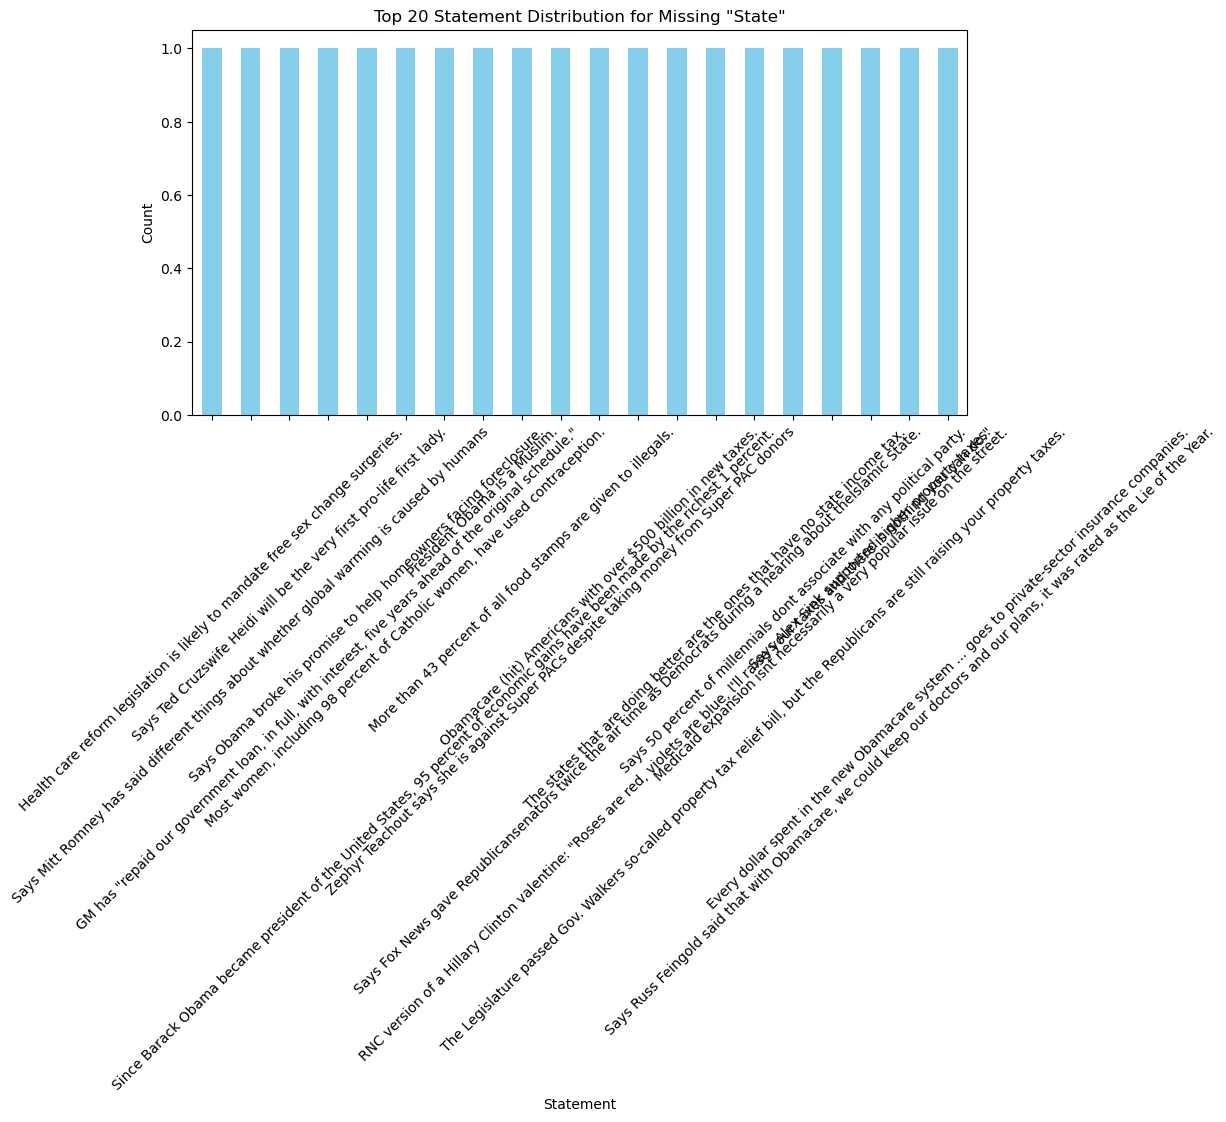

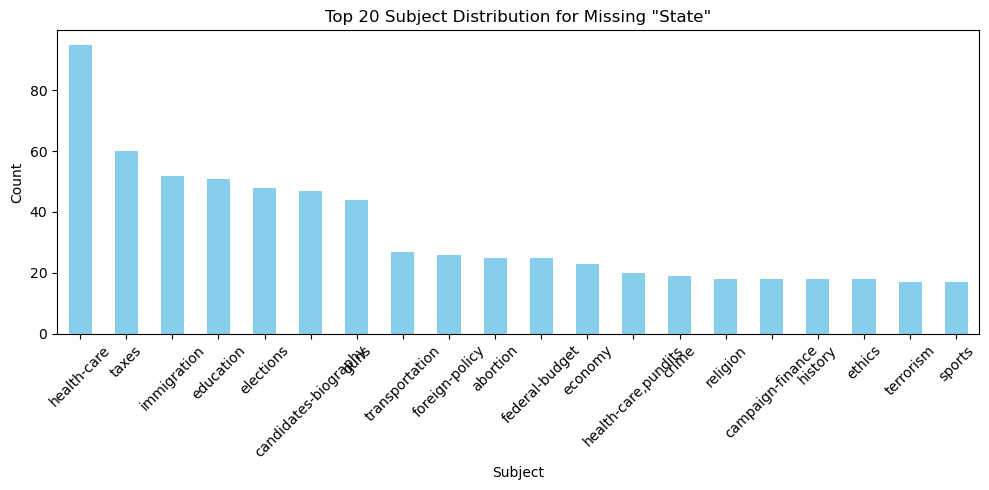

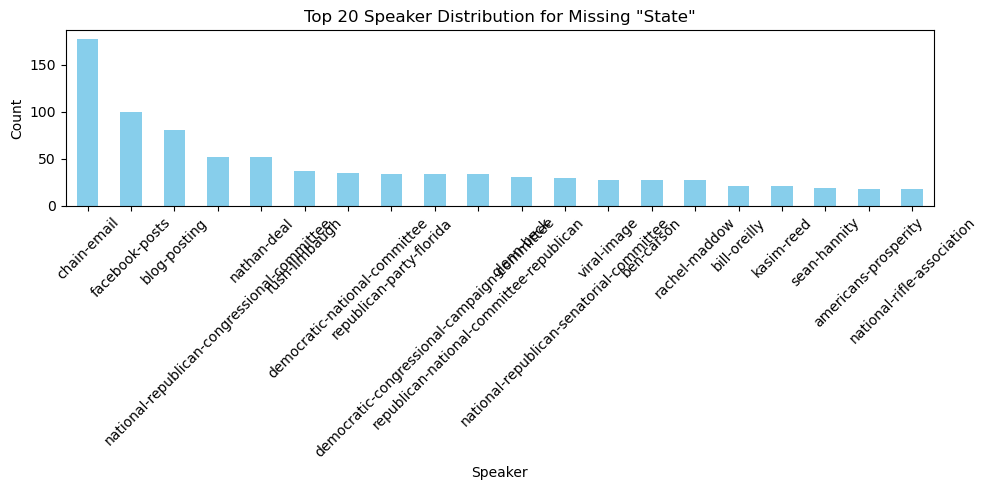

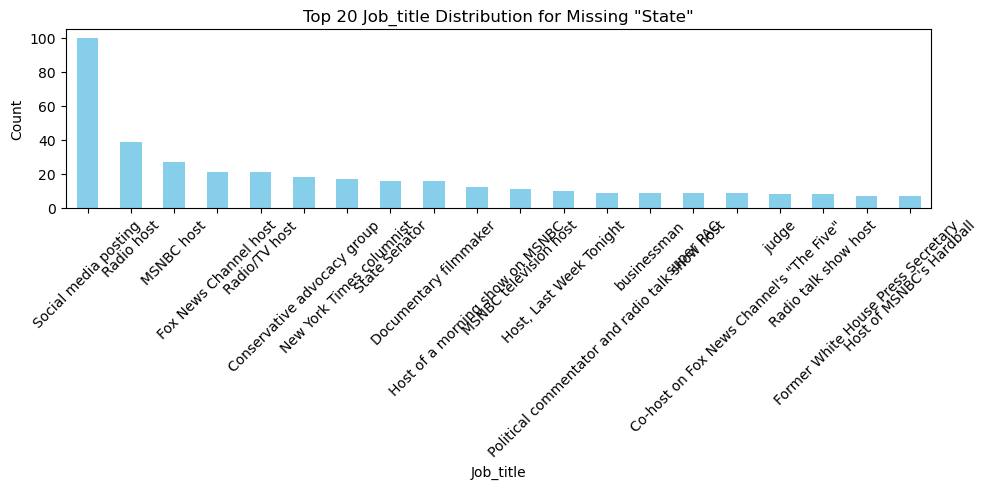

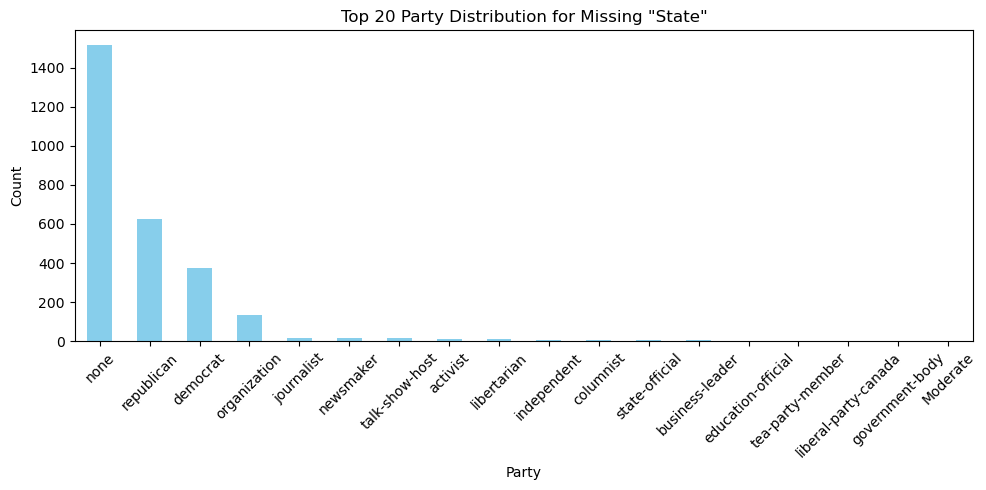

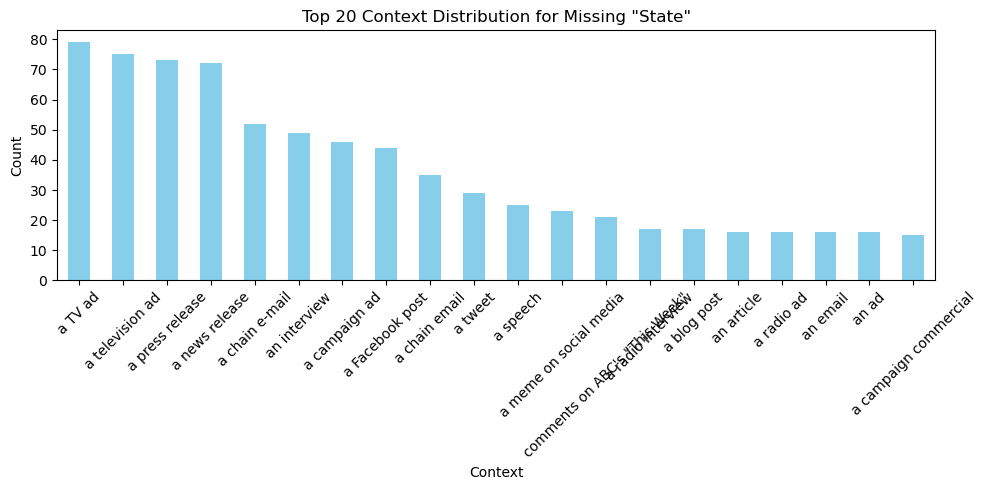

In [47]:

# Get all categorical features (excluding 'state' since it's NaN)
categorical_features = missing_state_rows.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('state')  # Exclude 'state' as it's NaN

# Generate bar plots for the top 20 values of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    feature_distribution = missing_state_rows[feature].value_counts().head(20)  # Top 20 values
    feature_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Top 20 {feature.capitalize()} Distribution for Missing "State"')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


understanding "job_title", "state" and subject. 

In [48]:
# replace the unknown.
# data['job_title'].replace('unknown', pd.NA, inplace=True)

In [49]:
missing_job_title_rows = data[data['job_title'].isna()]

# Save the filtered data to a CSV file
#missing_job_title_rows.to_csv('missing_job_title_rows.csv', index=False)

C:\Users\sigal\AppData\Local\Temp\ipykernel_25344\2140467934.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


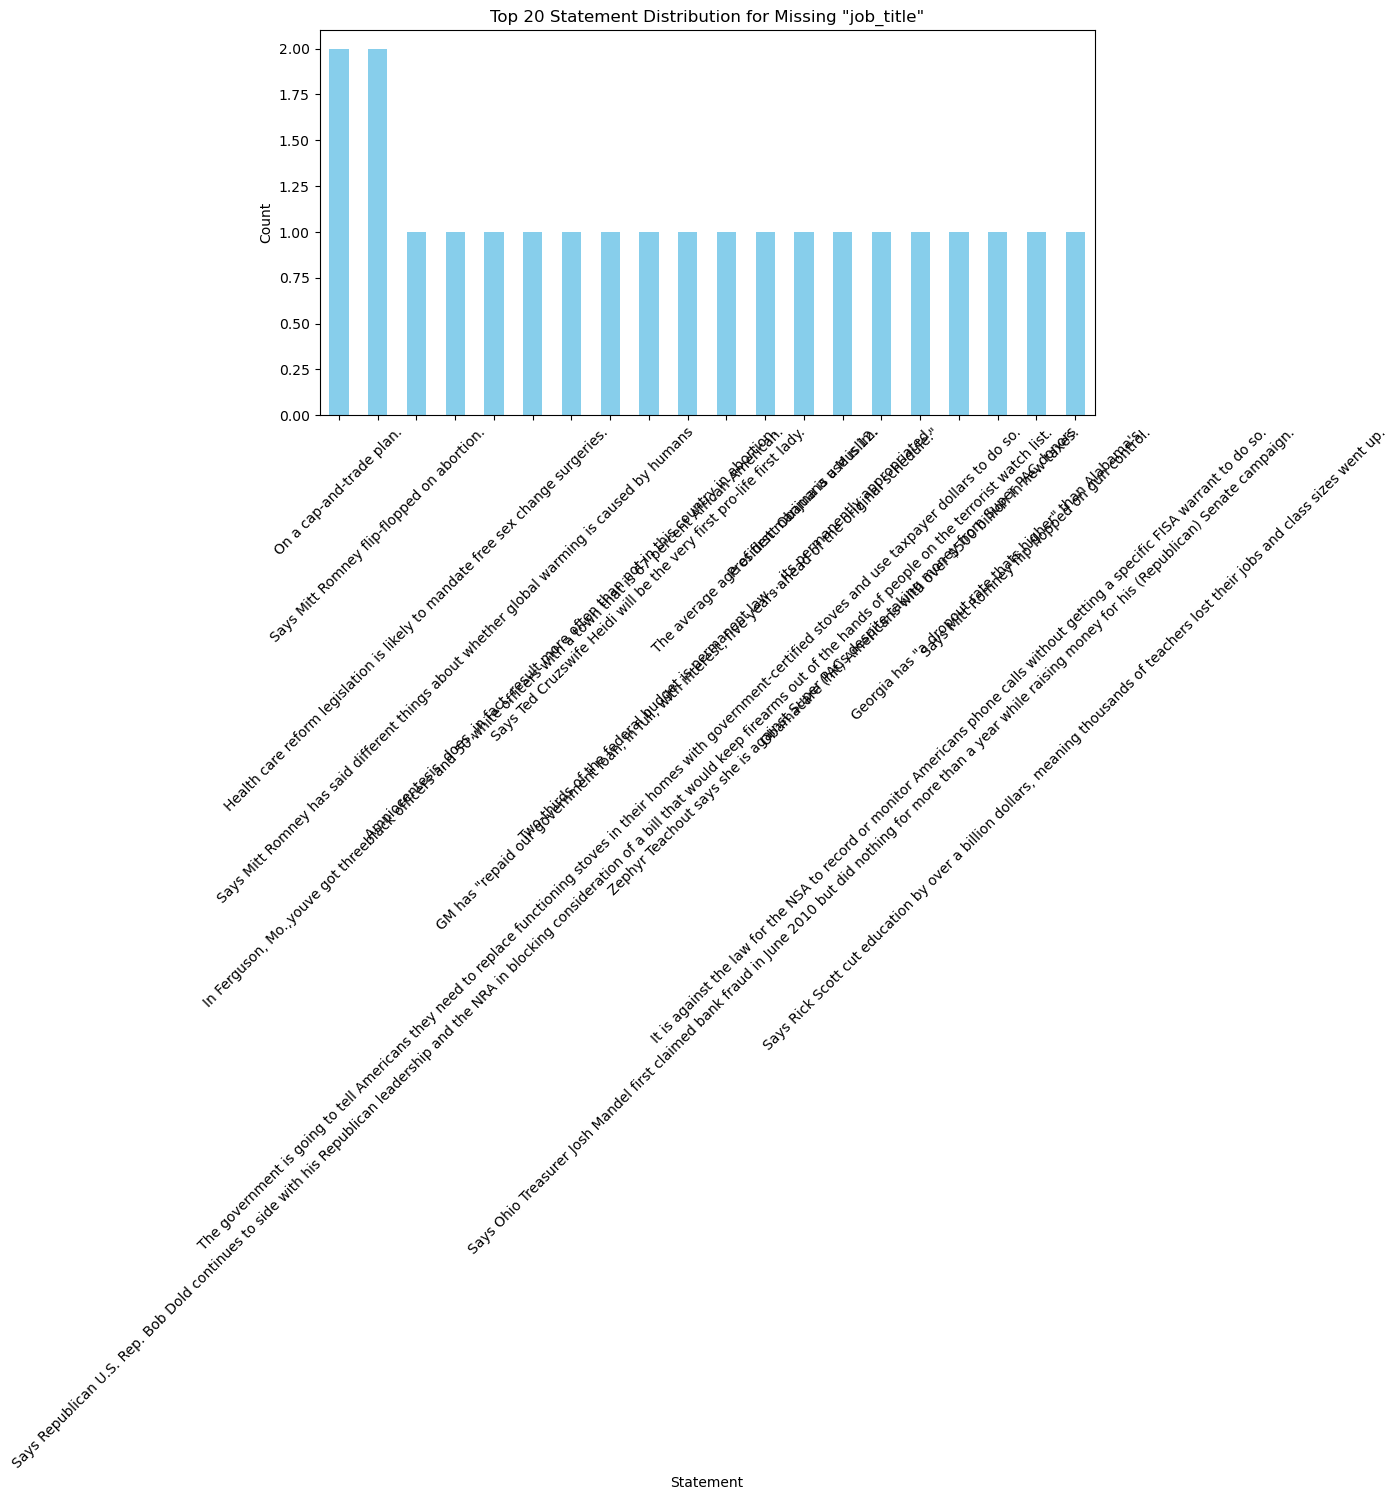

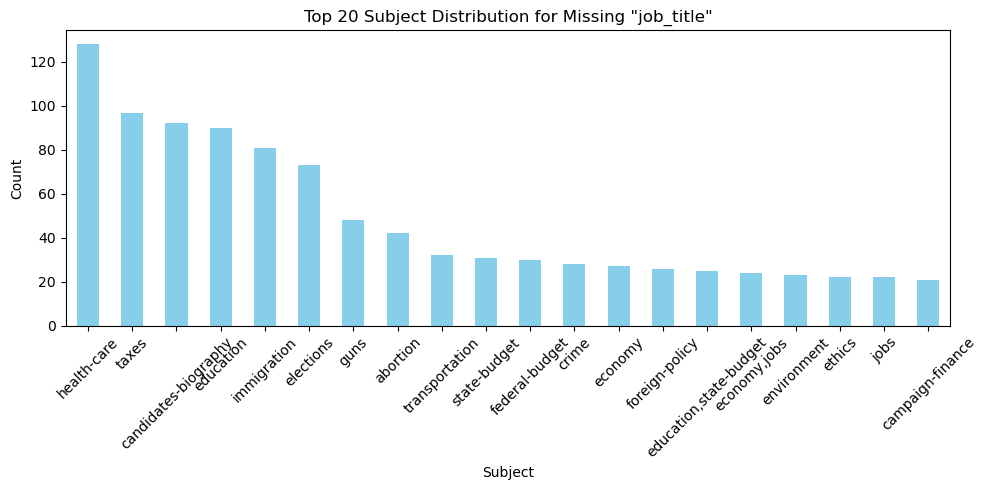

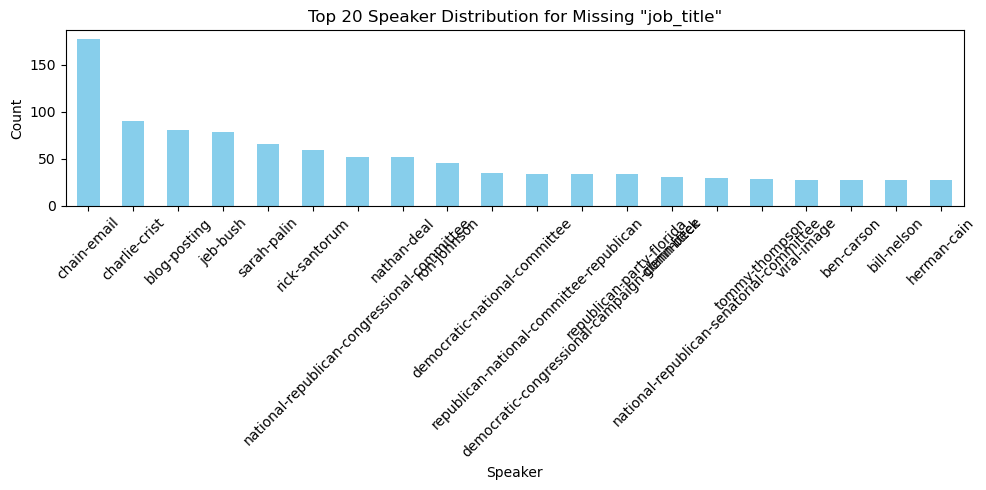

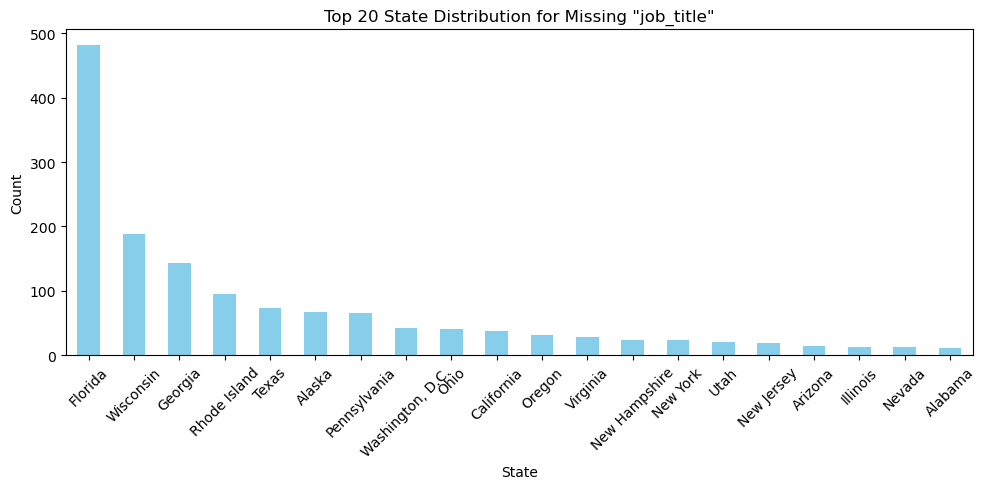

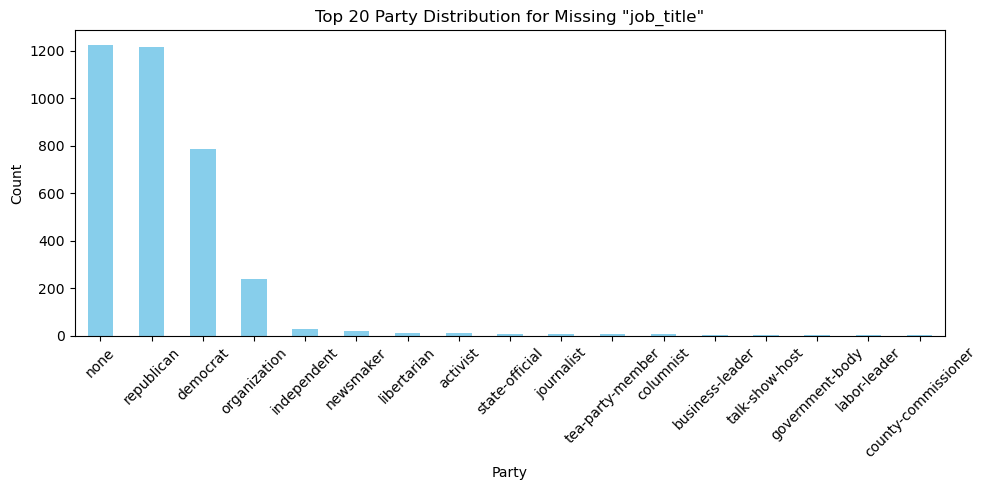

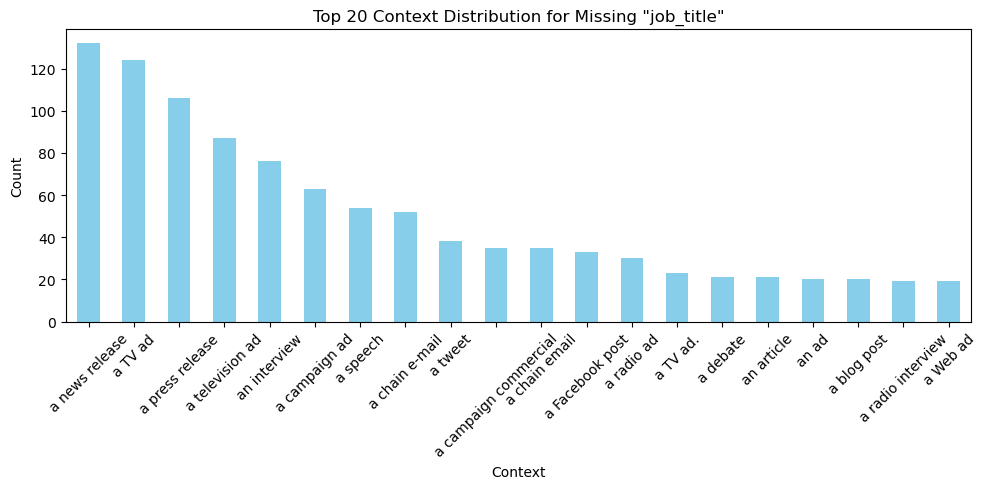

In [50]:

# Get all categorical features (excluding 'state' since it's NaN)
categorical_features = missing_job_title_rows.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('job_title')  # Exclude 'state' as it's NaN

# Generate bar plots for the top 20 values of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    feature_distribution = missing_job_title_rows[feature].value_counts().head(20)  # Top 20 values
    feature_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Top 20 {feature.capitalize()} Distribution for Missing "job_title"')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [51]:
# option to save all the data to csv.
data.to_csv('liar_data.csv', index=False)

# Embedding of Features.

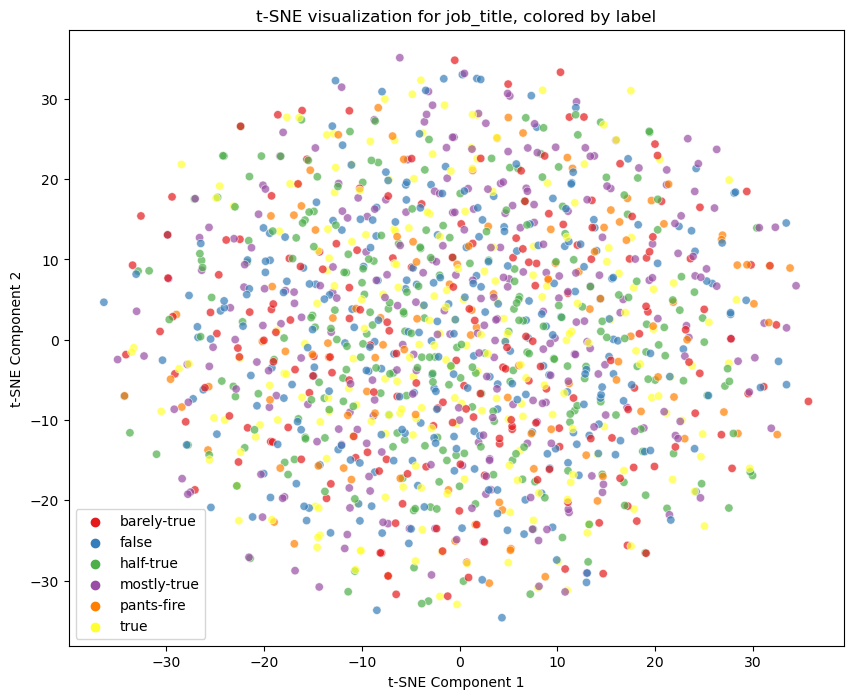

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import seaborn as sns

def clean_missing_values(data, column_name):
    """
    Replaces NaN or missing values in the specified column with 'unknown', since the meaning is good for the Word2Vec.
    """
    data[column_name] = data[column_name].fillna('unknown')
    return data


def prepare_data_for_word2vec(data, column_name):
    """
    Prepares a feature column for Word2Vec by ensuring it is a list of words.
    For 'subject', which may have multiple categories, the entries are split.
    """
    if column_name == 'subject':
        # For the subject column, split by commas as there might be multiple categories
        data[column_name] = data[column_name].apply(lambda x: x.split(','))
    else:
        # For job_title and state, each entry should be treated as a list with one element
        data[column_name] = data[column_name].apply(lambda x: [x])
    return data


def train_word2vec(data, column_name, vector_size=100, window=5, min_count=1):
    """
    Trains a Word2Vec model for the given feature (column_name).
    """
    # Prepare the sentences (lists of words) for Word2Vec
    sentences = data[column_name].tolist()
    
    # Train Word2Vec model, can be fine tuned @@ SIGAL or i can look at this better
    w2v_model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count, workers=4)
    
    return w2v_model

def extract_and_store_embeddings(w2v_model, data, column_name):
    """
    Extracts Word2Vec embeddings for each unique value in the feature column.
    """
    unique_values = data[column_name].explode().unique()  # Extract unique values
    embeddings = {value: w2v_model.wv[value] for value in unique_values if value in w2v_model.wv}
    
    # Return embeddings as a dictionary
    return embeddings

def visualize_embeddings(embeddings, labels, title='t-SNE visualization'):
    """
    Visualizes the embeddings using t-SNE and colors by labels.
    """
    # Extract unique words and their vectors
    words = list(embeddings.keys())
    vectors = np.array([embeddings[word] for word in words])
    
    # Apply t-SNE to reduce dimensions to 2D
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)
    
    # Plot the results, colored by label
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=labels[:len(words)], palette='Set1', legend='full', alpha=0.7)

    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

def process_and_visualize(data, column_name, label_column):
    """
    Processes the given feature, generates Word2Vec embeddings, and visualizes using t-SNE.
    """
    # A: Clean missing values
    data = clean_missing_values(data, column_name)
    
    # B: Prepare data for Word2Vec
    data = prepare_data_for_word2vec(data, column_name)
    
    # C: Train Word2Vec model
    w2v_model = train_word2vec(data, column_name)
    
    # D: Extract embeddings
    embeddings = extract_and_store_embeddings(w2v_model, data, column_name)
    
    # E: Visualize embeddings using t-SNE, colored by labels
    visualize_embeddings(embeddings, data[label_column].values, title=f't-SNE visualization for {column_name}, colored by {label_column}')

# Example usage for 'job_title', 'state', and 'subject'
if __name__ == "__main__":
    # Load your dataset
    #file_path = 'liar_data.csv'
    #data = pd.read_csv(file_path)
    
    # Process and visualize the 'job_title' column, colored by 'label'
    process_and_visualize(data, 'job_title', 'label')
    
    


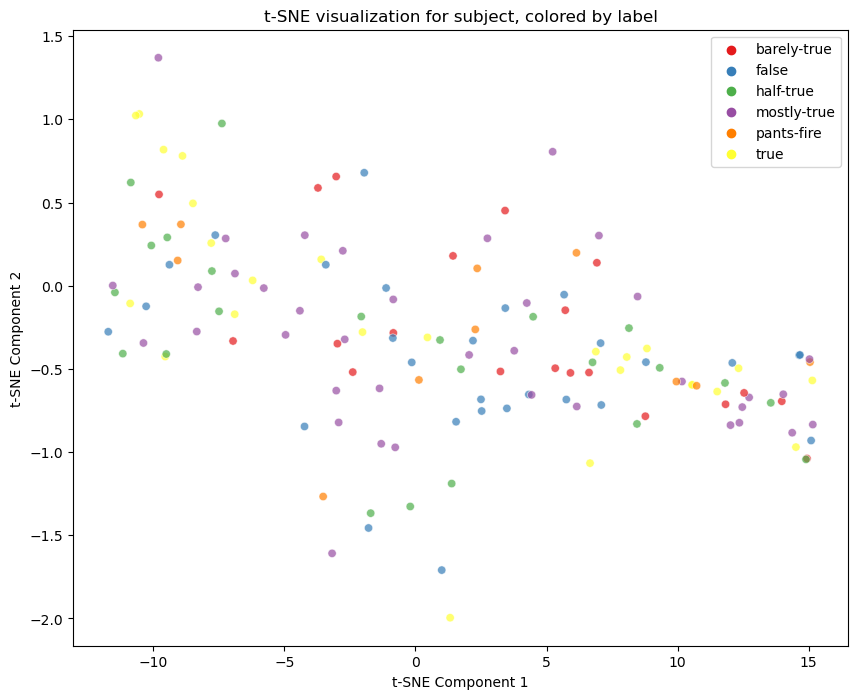

In [53]:
#process_and_visualize(data, 'state', 'label')
process_and_visualize(data, 'subject', 'label')

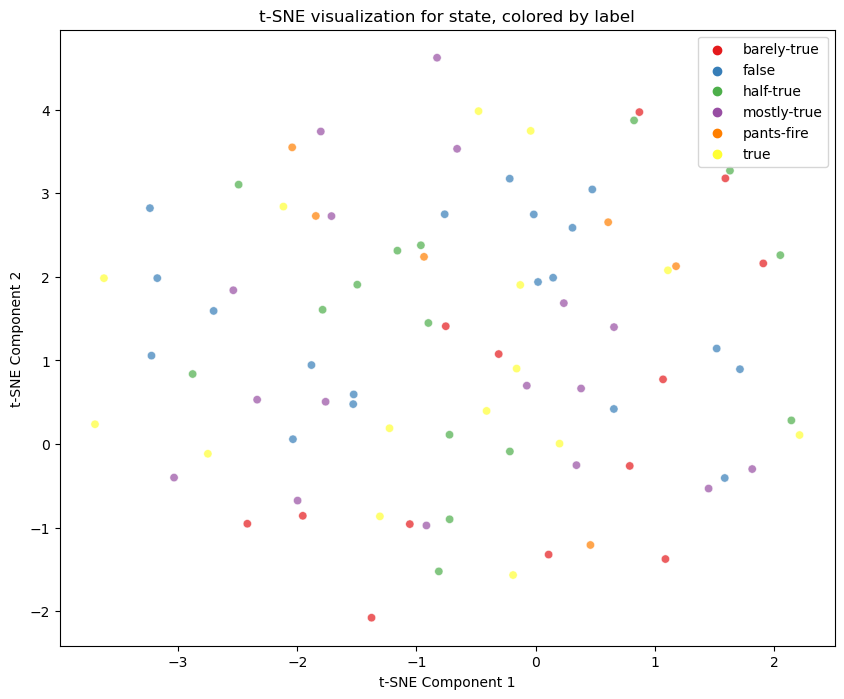

In [54]:
process_and_visualize(data, 'state', 'label')

In [55]:
data

,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
0,false,Says the Annies List political group supports ...,[abortion],dwayne-bohac,[State representative],[Texas],republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,72,6.545455
1,half-true,When did the decline of coal start? It started...,"[energy, history, job-accomplishments]",scott-surovell,[State delegate],[Virginia],democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,118,4.916667
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",[foreign-policy],barack-obama,[President],[Illinois],democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,87,4.578947
3,false,Health care reform legislation is likely to ma...,[health-care],blog-posting,[unknown],[unknown],none,7.0,19.0,3.0,5.0,44.0,a news release,12,67,5.583333
4,half-true,The economic turnaround started at the end of ...,"[economy, jobs]",charlie-crist,[unknown],[Florida],democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,45,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,half-true,"For the first time in more than a decade, impo...","[energy, oil-spill, trade]",barack-obama,[President],[Illinois],democrat,70.0,71.0,160.0,163.0,9.0,a press conference,20,85,4.250000
1280,mostly-true,Says Donald Trump has bankrupted his companies...,[candidates-biography],hillary-clinton,[Presidential candidate],[New York],democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,14,69,4.928571
1281,true,"John McCain and George Bush have ""absolutely n...",[health-care],campaign-defend-america,[unknown],"[Washington, D.C.]",none,0.0,1.0,0.0,2.0,0.0,a television ad,13,68,5.230769


In [56]:
def replace_with_word2vec_embeddings(data, column_names):
    """
    This function replaces the original column values with Word2Vec embeddings.
    """
    for column_name in column_names:
        # Clean missing values (assuming missing values were handled earlier)
        
        # Prepare data for Word2Vec
        data[column_name] = data[column_name].apply(lambda x: str(x).replace(',', '').split())

        # Train Word2Vec model
        sentences = data[column_name].tolist()
        w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
        
        # Create a new column to store embeddings
        embeddings = []
        
        # Extract embeddings and store them in the new column
        for values in data[column_name]:
            embedding = np.mean([w2v_model.wv[word] for word in values if word in w2v_model.wv], axis=0)
            
            if embedding is not None:
                embeddings.append(embedding.tolist())
            else:
                embeddings.append([0] * 100)  # Fallback for missing embeddings
        
        # Replace the original column with the new embedding column
        data[column_name + '_embedding'] = embeddings
    
    return data

# Apply embeddings for 'job_title' and 'state' columns
columns_to_embed = ['job_title', 'state']
data = replace_with_word2vec_embeddings(data, columns_to_embed)


In [57]:
columns_to_embed = ['job_title', 'state', 'subject']

# Replace the original columns with Word2Vec embeddings
data = replace_with_word2vec_embeddings(data, columns_to_embed)


In [58]:

data['job_title'].head()
data


,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement,job_title_embedding,state_embedding,subject_embedding
statement_id,,,,,,,,,,,,,,,,,,,
0,false,Says the Annies List political group supports ...,[['abortion']],dwayne-bohac,"[[""['State"", ""representative']""]]","[[""['Texas']""]]",republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,72,6.545455,"[-0.005771053954958916, 0.04884454980492592, -...","[9.456396219320595e-05, 0.003077319823205471, ...","[0.00859692133963108, -0.005859029479324818, -..."
1,half-true,When did the decline of coal start? It started...,"[['energy', 'history', 'job-accomplishments']]",scott-surovell,"[[""['State"", ""delegate']""]]","[[""['Virginia']""]]",democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,118,4.916667,"[-0.011687331832945347, 0.035753507167100906, ...","[-0.0051562427543103695, -0.006668337620794773...","[-0.05727263167500496, 0.08289764076471329, -0..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",[['foreign-policy']],barack-obama,"[[""['President']""]]","[[""['Illinois']""]]",democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,87,4.578947,"[-0.007139015011489391, 0.0012410306371748447,...","[0.008132271468639374, -0.00445733405649662, -...","[0.004213253036141396, 0.002396209165453911, -..."
3,false,Health care reform legislation is likely to ma...,[['health-care']],blog-posting,"[[""['unknown']""]]","[[""['unknown']""]]",none,7.0,19.0,3.0,5.0,44.0,a news release,12,67,5.583333,"[-0.0005362272495403886, 0.0002364313550060615...","[-0.0005362272495403886, 0.0002364313550060615...","[-0.00824267789721489, 0.009299354627728462, -..."
4,half-true,The economic turnaround started at the end of ...,"[['economy', 'jobs']]",charlie-crist,"[[""['unknown']""]]","[[""['Florida']""]]",democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,45,4.500000,"[-0.0005362272495403886, 0.0002364313550060615...","[-0.00824267789721489, 0.009299354627728462, -...","[-0.047192223370075226, 0.07692526280879974, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,half-true,"For the first time in more than a decade, impo...","[['energy', 'oil-spill', 'trade']]",barack-obama,"[[""['President']""]]","[[""['Illinois']""]]",democrat,70.0,71.0,160.0,163.0,9.0,a press conference,20,85,4.250000,"[-0.007139015011489391, 0.0012410306371748447,...","[0.008132271468639374, -0.00445733405649662, -...","[-0.04247934743762016, 0.0694710910320282, -0...."
1280,mostly-true,Says Donald Trump has bankrupted his companies...,[['candidates-biography']],hillary-clinton,"[[""['Presidential"", ""candidate']""]]","[[""['New"", ""York']""]]",democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,14,69,4.928571,"[-0.019893623888492584, 0.019057411700487137, ...","[0.014495495706796646, -0.001840108190663159, ...","[-0.00023748517560306937, 0.004219176713377237..."
1281,true,"John McCain and George Bush have ""absolutely n...",[['health-care']],campaign-defend-america,"[[""['unknown']""]]","[[""['Washington"", ""D.C.']""]]",none,0.0,1.0,0.0,2.0,0.0,a television ad,13,68,5.230769,"[-0.0005362272495403886, 0.0002364313550060615...","[0.056386061012744904, -0.012443335726857185, ...","[-0.00824267789721489, 0.009299354627728462, -..."


c:\Users\sigal\anaconda3\Lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


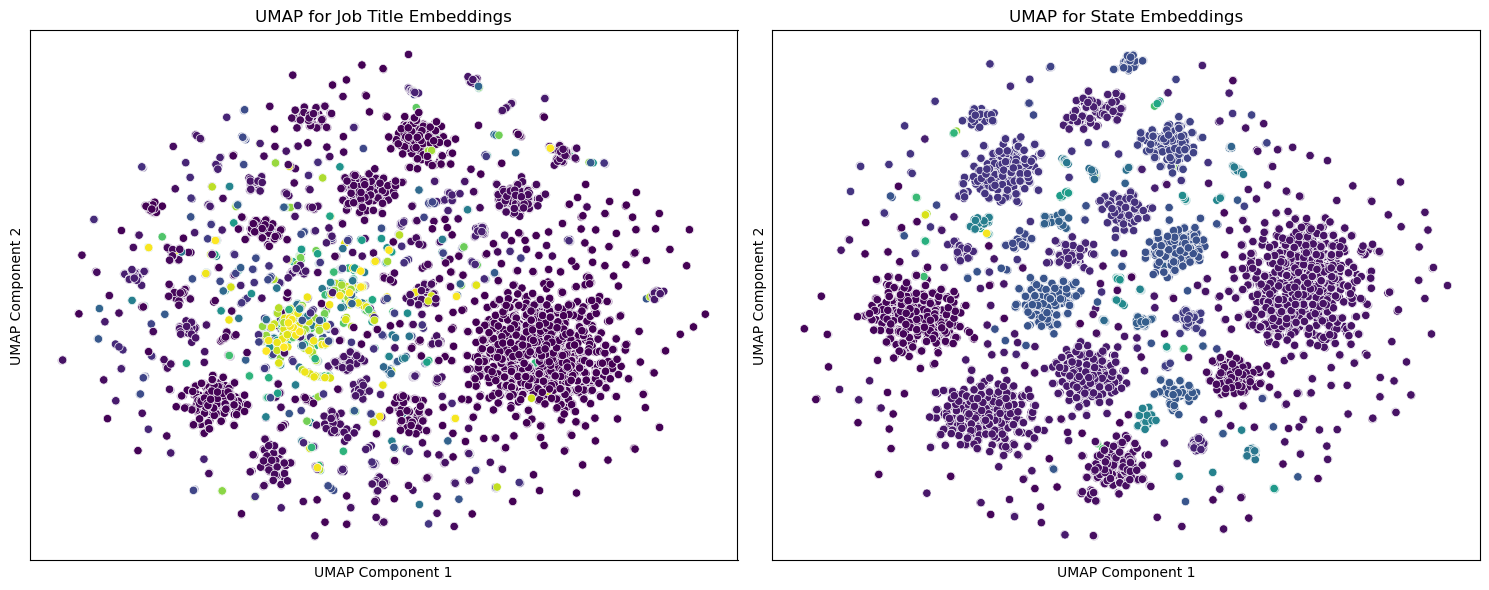